<b>Robins School of Business</b><br/>
<b>ECON 242 - Data Visualization Basics</b><br/>
<b>Spring 2022</b>
____________________________________________

<h1>Data Visualization - Plotly - Reading Questions (Answer Key)</h1>

<b>Before we begin let us import the required modules for this question set.</b>

In [21]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

<b>And also the datasets:</b>

In [22]:
#
# Create the datframes for this exercise
#

# Create a dataframe with cross-county economics data
dfEcon = pd.read_csv("~/../smehkari/EconCourses/data/econdata1.csv")

# Load the gap minder dataset from plotly
import plotly.express as px
dfGapMinder = px.data.gapminder()

# Create a dataframe with cross-county economics data
dfCOVID = pd.read_csv("~/../smehkari/EconCourses/data/CovidData.csv")

<b> Q1a. Construct a simple scatter plot showing the relationship between percentage of population with a bachelors and higher degree and median household income (with a template = simple_white): </b>

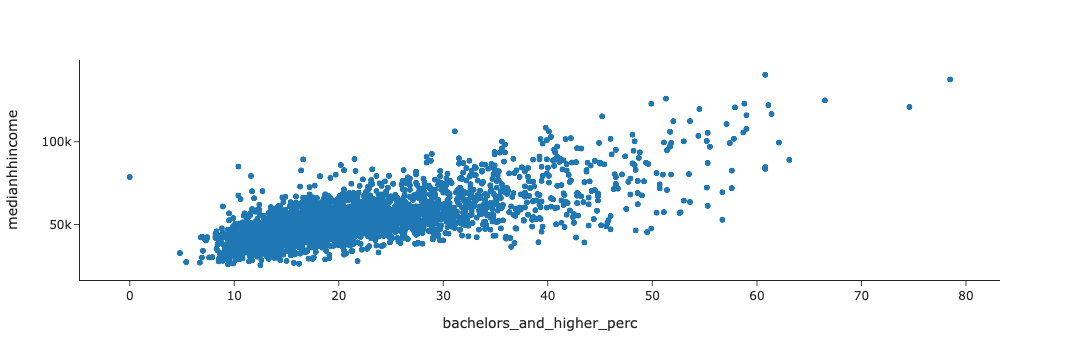

In [23]:
fig = px.scatter(dfEcon, 
                 x = 'bachelors_and_higher_perc',
                 y = 'medianhhincome',
                 template = 'simple_white')

fig.show()

<b> Q1b. Construct a simple scatter plot showing the relationship between percentage of population with a bachelors and higher degree and median household income (with a template = plotly_dark). Also, make sure that when you hover over the data it shows the name of the county and fix the labels to Median Household Income and Percentage of Bachelors and Higher:</b>

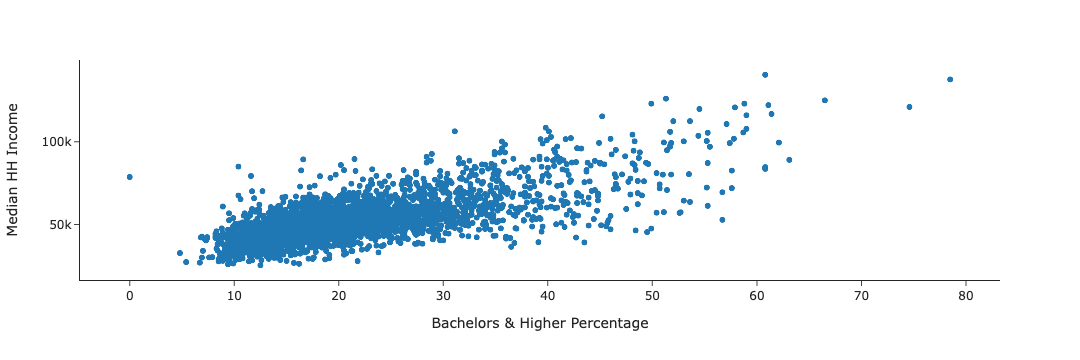

In [24]:
fig = px.scatter(dfEcon, 
                 x = 'bachelors_and_higher_perc',
                 y = 'medianhhincome',
                 template = 'simple_white', 
                hover_name = 'county_name', 
                labels = {'bachelors_and_higher_perc':'Bachelors & Higher Percentage',
                          'medianhhincome':'Median HH Income'})

fig.show()

<b> Q1c. Build the same plot as above but adjust the colors and symbol to match the region name. See what happens when you click on the legend entries: </b>

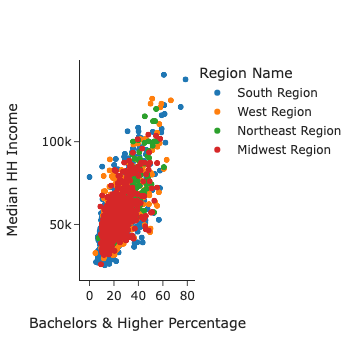

In [25]:
fig = px.scatter(dfEcon, 
                 x = 'bachelors_and_higher_perc',
                 y = 'medianhhincome',
                 template = 'simple_white', 
                hover_name = 'county_name', 
                 color = 'region_name',
                labels = {'bachelors_and_higher_perc':'Bachelors & Higher Percentage',
                          'medianhhincome':'Median HH Income',
                         'region_name':'Region Name'})

fig.show()

<b> Q1d. Extract data for the US, Canada, and Mexico from the Gap Minder dataset and plot the life expentancy over time (Hint: This is a line plot). Differentiate the three by color. Use the simple white theme:</b>

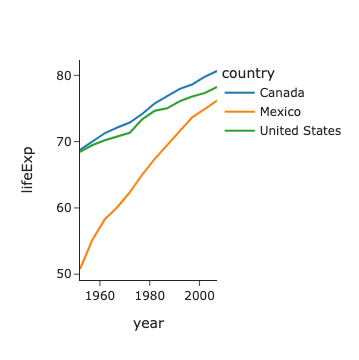

In [26]:
dfTemp = dfGapMinder[dfGapMinder['country'].isin(["United States", "Canada", "Mexico"])]
fig = px.line(dfTemp, 
              x = 'year',
              y = 'lifeExp',
              color = 'country',
              template = 'simple_white')

fig.show()

<b> Q1e. Plot the histogram of unemployment rates in the data. Differentiate the region names by color:</b>

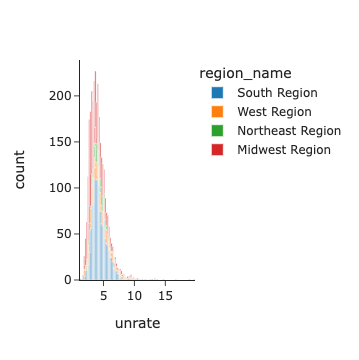

In [27]:
fig = px.histogram(dfEcon, 
                   x = 'unrate',
                   template = 'simple_white',
                   color = 'region_name')

fig.show()

<b> Q1f. Plot the unemployment rates distribution as a violin plot by census region:</b>

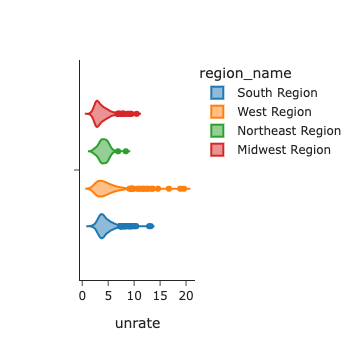

In [28]:
fig = px.violin(dfEcon, 
                x = 'unrate',
                template = 'simple_white',
                color = 'region_name')

fig.show()

<b> Q1g. Construct a scatter matrix showing the relationship between percentage of population with a bachelors and higher degree,  median household income, and unemployment rate by census region:</b>

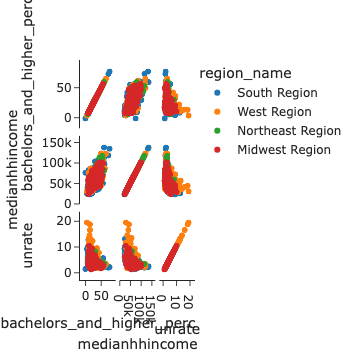

In [29]:
fig = px.scatter_matrix(dfEcon, 
                        dimensions = ['bachelors_and_higher_perc', 'medianhhincome', 'unrate'],
                        color = 'region_name',
                        template = 'simple_white')

fig.show()

<b> Q1h. Construct a 3D scatter showing the relationship between percentage of population with a bachelors and higher degree,  median household income, and unemployment rate by census region: </b>

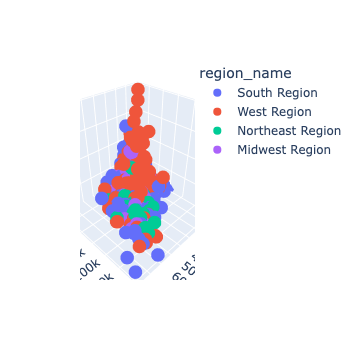

In [30]:
fig = px.scatter_3d(dfEcon, 
                    x = 'bachelors_and_higher_perc', 
                    y = 'medianhhincome',
                    z = 'unrate',
                    color = 'region_name')
fig.show()

<b> Q1i. Try to determine what the code below does?</b>

In [31]:
fig = px.scatter(dfGapMinder, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country", 
                 size="pop", 
                 color="continent", 
                 hover_name="country", 
                 range_x=[300,50000], 
                 range_y=[25,90], 
                 template = 'plotly_dark')
fig.write_html('gapMinder.html')


<b> Q1j. Try to determine what the code below does?</b>

In [18]:
dfCOVID['Total Cases per Million Persons'] = 1000000*dfCOVID['Total Cases']/dfCOVID['Population']
fig = px.scatter(dfCOVID, x="stcde", y="New Cases per Million Persons", color="Census Region", animation_frame="Date",
           hover_name= "State Name", 
           hover_data = ["New Cases", "Total Cases", "Population"],
           range_y=[0,5000],
           template = "simple_white",        
           size = 'Total Cases per Million Persons',
           labels = {"stcde": "State"},        
           title = "New Daily Cases (COVID-19)")
fig.write_html('covid.html')